In [1]:
!pip install yfinance

[*********************100%***********************]  2 of 2 completed


Ticker            ADBE       MSFT
Date                             
2018-03-01  210.320007  93.989998
2018-03-02  203.960007  91.580002
2018-03-05  208.750000  92.339996
2018-03-06  212.440002  94.339996
2018-03-07  211.330002  93.160004


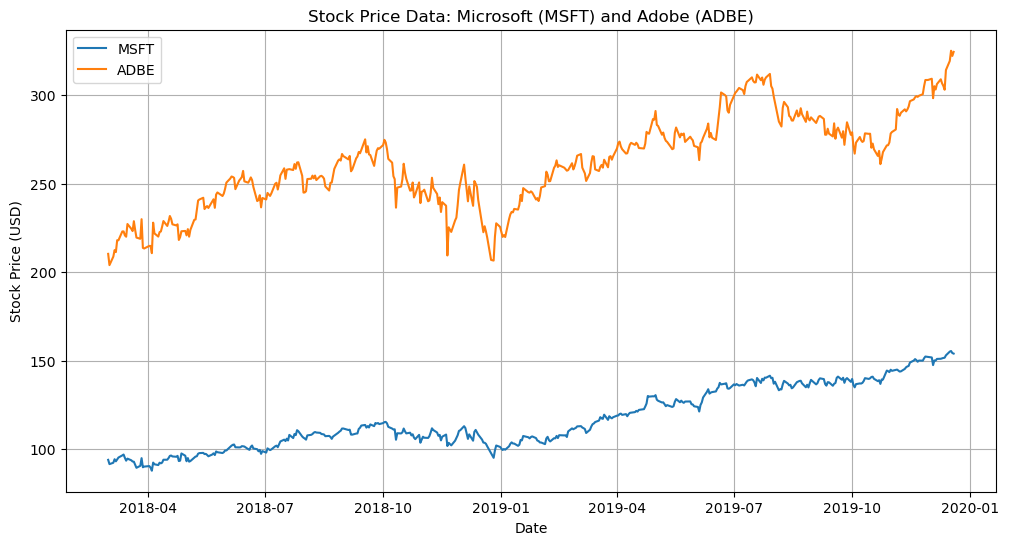

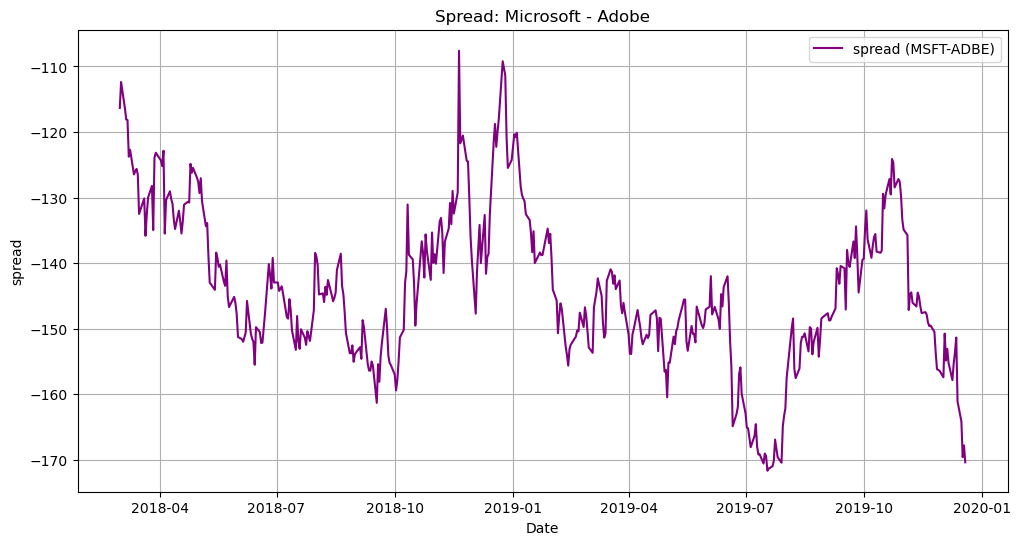

In [48]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
tickers = ['MSFT', 'ADBE']

data = yf.download(tickers, start="2018-03-01", end="2019-12-20")['Open']
print(data.head())
data['spread'] = data['MSFT'] - data['ADBE']
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)

plt.title("Stock Price Data: Microsoft (MSFT) and Adobe (ADBE)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['spread'], label='spread (MSFT-ADBE)', color='purple')
plt.title("Spread: Microsoft - Adobe")
plt.xlabel("Date")
plt.ylabel("spread")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['spread'].dropna())  

adf_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Number of Lags Used": adf_test[2],
    "Number of Observations": adf_test[3]
}
print("ADF Test Results:")
for key, value in adf_result.items():
    print(f"{key}: {value}")


ADF Test Results:
ADF Statistic: -3.235089597272752
p-value: 0.01804130626996287
Number of Lags Used: 1
Number of Observations: 454


Ticker            ADBE        MSFT      spread       MAVG5      MAVG20  \
Date                                                                     
2019-12-13  314.109985  153.000000 -161.109985 -155.847998 -152.920499   
2019-12-16  319.269989  155.110001 -164.159988 -157.111996 -153.747997   
2019-12-17  325.040009  155.449997 -169.590012 -159.963998 -154.853499   
2019-12-18  322.100006  154.300003 -167.800003 -162.801999 -155.849999   
2019-12-19  324.380005  154.000000 -170.380005 -166.607999 -156.914999   

Ticker          MAVG60     STD20      STD60  ZScore20_5  ZScore60_5  \
Date                                                                  
2019-12-13 -141.935498  3.865535   9.722477   -0.757334   -1.430962   
2019-12-16 -142.328331  4.402957  10.134624   -0.764032   -1.458729   
2019-12-17 -142.876498  5.407467  10.698818   -0.945082   -1.597139   
2019-12-18 -143.352831  5.869438  11.159563   -1.184440   -1.742825   
2019-12-19 -143.952498  6.477328  11.627228   -1.496451

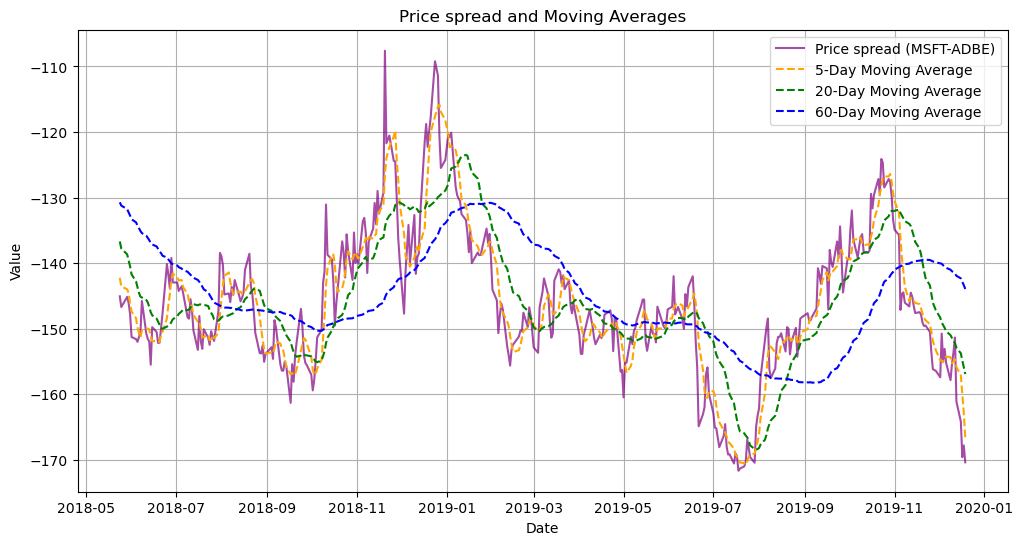

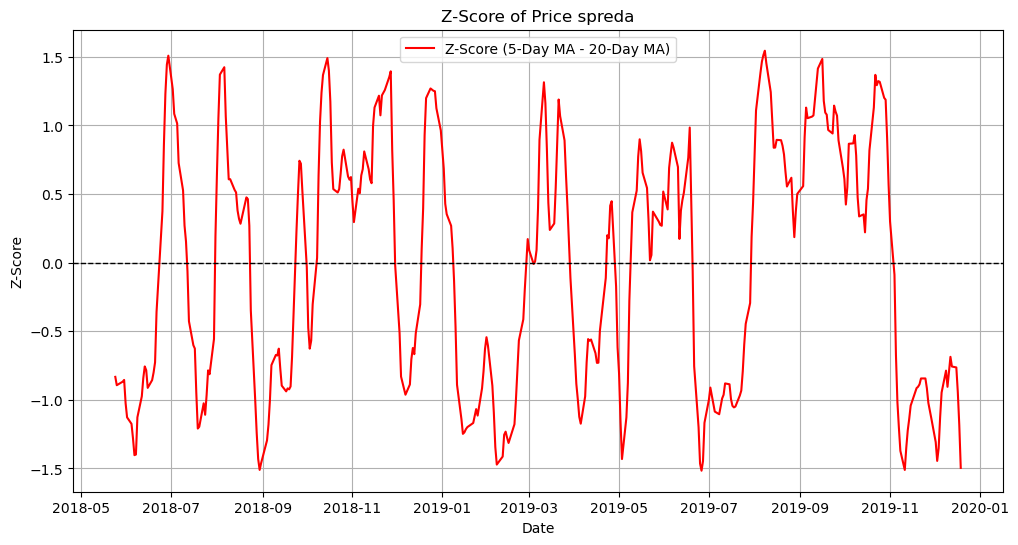

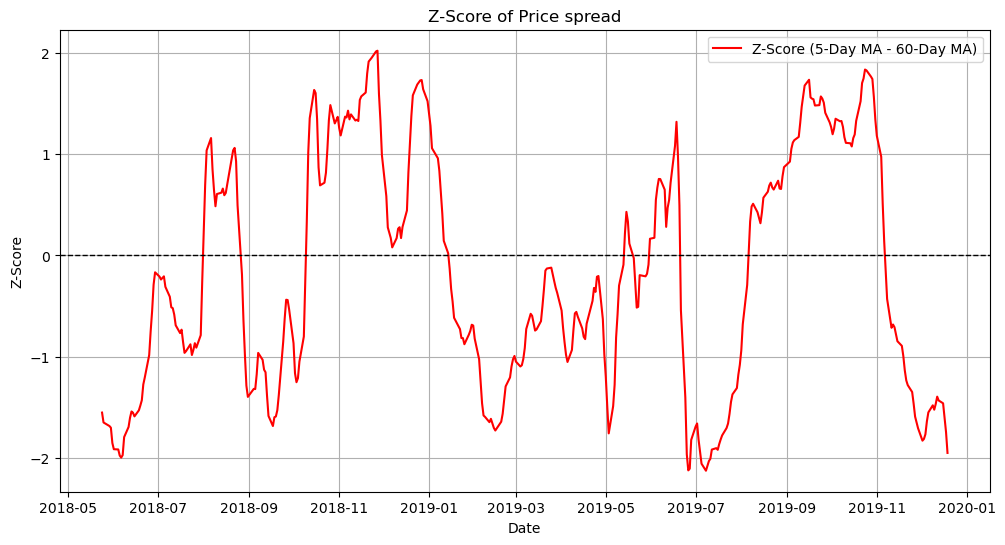

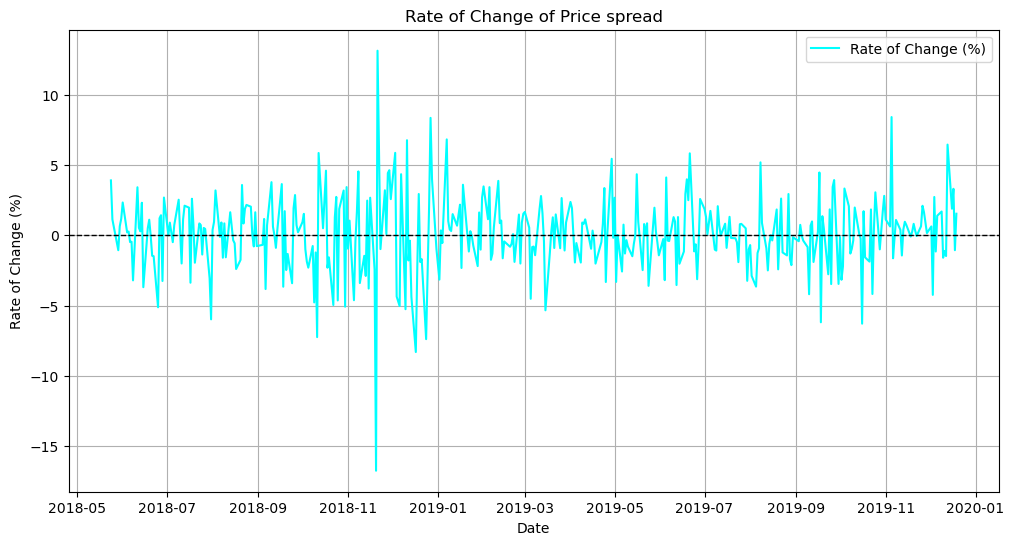

ADF Test Results:
ADF Statistic: -12.078957691680882
p-value: 2.2555835923661325e-22
Number of Lags Used: 3
Number of Observations: 393


In [52]:
# Calculate moving averages (5-day, 20-day, and 60-day)
data['MAVG5'] = data['spread'].rolling(window=5).mean()
data['MAVG20'] = data['spread'].rolling(window=20).mean()
data['MAVG60'] = data['spread'].rolling(window=60).mean()

# Calculate the 20-day rolling standard deviation of the ratio
data['STD20'] = data['spread'].rolling(window=20).std()
data['STD60'] = data['spread'].rolling(window=60).std()

# Calculate the z-score (20-day MA and 5-day MA)
data['ZScore20_5'] = (data['MAVG5'] - data['MAVG20']) / data['STD20']
data['ZScore60_5'] = (data['MAVG5'] - data['MAVG60']) / data['STD60']

# Calculate the rate of change (percentage change over 1 day)
data['RateOfChange'] = data['spread'].pct_change() * 100

# Drop rows with NaN values (caused by insufficient data for rolling calculations)
data = data.dropna()

# Display the last few rows of the DataFrame
print(data.tail())

# Plot the ratio and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['spread'], label='Price spread (MSFT-ADBE)', color='purple', alpha=0.7)
plt.plot(data['MAVG5'], label='5-Day Moving Average', color='orange', linestyle='--')
plt.plot(data['MAVG20'], label='20-Day Moving Average', color='green', linestyle='--')
plt.plot(data['MAVG60'], label='60-Day Moving Average', color='blue', linestyle='--')
plt.title("Price spread and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot the z-score
plt.figure(figsize=(12, 6))
plt.plot(data['ZScore20_5'], label='Z-Score (5-Day MA - 20-Day MA)', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at z-score = 0
plt.title("Z-Score of Price spreda")
plt.xlabel("Date")
plt.ylabel("Z-Score")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['ZScore60_5'], label='Z-Score (5-Day MA - 60-Day MA)', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at z-score = 0
plt.title("Z-Score of Price spread")
plt.xlabel("Date")
plt.ylabel("Z-Score")
plt.legend()
plt.grid(True)
plt.show()

# Plot the rate of change
plt.figure(figsize=(12, 6))
plt.plot(data['RateOfChange'], label='Rate of Change (%)', color='cyan')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at ROC = 0
plt.title("Rate of Change of Price spread")
plt.xlabel("Date")
plt.ylabel("Rate of Change (%)")
plt.legend()
plt.grid(True)
plt.show()

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['RateOfChange'].dropna())  

adf_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Number of Lags Used": adf_test[2],
    "Number of Observations": adf_test[3]
}
print("ADF Test Results:")
for key, value in adf_result.items():
    print(f"{key}: {value}")


In [40]:
!pip install ffn
!pip install pykalman

In [41]:
import numpy as np
import pandas as pd
import matplotlib
from pykalman import KalmanFilter
from datetime import datetime
from numpy import log, polyfit, sqrt, std, subtract
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import ffn
import warnings
warnings.filterwarnings('ignore')

In [56]:
sm.tsa.stattools.coint(data['ADBE'], data['MSFT'])

(-3.2854922404368567,
 0.05675580143242237,
 array([-3.92431011, -3.35160306, -3.05517745]))

In [74]:
#applying hust ratio to see how closely are the two correlated
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

def half_life(spread):
    spread_lag = spread.shift(1)
    spread_lag.iloc[0] = spread_lag.iloc[1]

    spread_ret = spread - spread_lag
    spread_ret.iloc[0] = spread_ret.iloc[1]

    spread_lag2 = sm.add_constant(spread_lag)

    model = sm.OLS(spread_ret,spread_lag2)
    res = model.fit()
    halflife = int(round(-np.log(2) / res.params[1],0))

    if halflife <= 0:
        halflife = 1
    return halflife
    
def KalmanFilterAverage(x):
    # Construct a Kalman filter
    from pykalman import KalmanFilter
    kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = 0,
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)

    # Use the observed values of the price to get a rolling mean
    state_means, _ = kf.filter(x.values)
    state_means = pd.Series(state_means.flatten(), index=x.index)
    return state_means

def KalmanFilterRegression(x,y):

    delta = 1e-3
    trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
    obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)

    kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
                      initial_state_mean=[0,0],
                      initial_state_covariance=np.ones((2, 2)),
                      transition_matrices=np.eye(2),
                      observation_matrices=obs_mat,
                      observation_covariance=2,
                      transition_covariance=trans_cov)

    # Use the observations y to get running estimates and errors for the state parameters
    state_means, state_covs = kf.filter(y.values)
    return state_means

def backtest(x, y):

    # INPUT:
    # s1: the symbol of contract one
    # s2: the symbol of contract two
    # x: the price series of contract one
    # y: the price series of contract two

    # OUTPUT:
    # df1['cum rets']: cumulative returns in pandas data frame
    # sharpe: sharpe ratio

    # Run regression to find hedge ratio and then create spread series
    df1 = pd.DataFrame({'y':y,'x':x})
    state_means = KalmanFilterRegression(KalmanFilterAverage(x),KalmanFilterAverage(y))

    df1['hr'] = - state_means[:,0]
    df1['spread'] = df1.y + (df1.x * df1.hr)

    ##############################################################

    halflife = half_life(df1['spread'])

    ##########################################################

    meanSpread = df1.spread.rolling(window=halflife).mean()
    stdSpread = df1.spread.rolling(window=halflife).std()


    df1['zScore'] = (df1.spread-meanSpread)/stdSpread

    ##############################################################

    entryZscore = 2
    exitZscore = 0

    # Set up num units long
    df1['long entry'] = ((df1.zScore < - entryZscore) & ( df1.zScore.shift(1) > - entryZscore))
    df1['long exit'] = ((df1.zScore > - exitZscore) & (df1.zScore.shift(1) < - exitZscore))
    df1['num units long'] = np.nan
    df1.loc[df1['long entry'],'num units long'] = 1
    df1.loc[df1['long exit'],'num units long'] = 0
    df1['num units long'][0] = 0
    df1['num units long'] = df1['num units long'].fillna(method='pad')

    # Set up num units short
    df1['short entry'] = ((df1.zScore >  entryZscore) & ( df1.zScore.shift(1) < entryZscore))
    df1['short exit'] = ((df1.zScore < exitZscore) & (df1.zScore.shift(1) > exitZscore))
    df1.loc[df1['short entry'],'num units short'] = -1
    df1.loc[df1['short exit'],'num units short'] = 0
    df1['num units short'][0] = 0
    df1['num units short'] = df1['num units short'].fillna(method='pad')

    df1['numUnits'] = df1['num units long'] + df1['num units short']
    df1['spread pct ch'] = (df1['spread'] - df1['spread'].shift(1)) / ((df1['x'] * abs(df1['hr'])) + df1['y'])
    df1['port rets'] = df1['spread pct ch'] * df1['numUnits'].shift(1)

    df1['cum rets'] = df1['port rets'].cumsum()
    df1['cum rets'] = df1['cum rets'] + 1

    try:
        sharpe = ((df1['port rets'].mean() / df1['port rets'].std()) * sqrt(252))
    except ZeroDivisionError:
        sharpe = 0.0

    #############################################################
    return df1['cum rets'], sharpe

In [84]:
ret = pd.DataFrame()


x = data['MSFT']
y = data['ADBE']


tmp, sharpe = backtest(x, y)

ret = tmp.values
print(ret)
print(tmp)
print(ret.iloc[0])

[nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [86]:
perf = ret.calc_stats()
perf.display()

AttributeError: 'numpy.ndarray' object has no attribute 'calc_stats'